# Object detection

### Code explanation

The repository consists of several files and folders:

files - detect.py, train.py
folders-models, model_weights, utils, training_data, tensorboard


In the model_weights folder there is a file with pre-trained on COCO dataset using YOLOv3.

detect.py feeds the YOLOv3 model image and saves the new image with the detected objects. Describe the structure of the detect.py:

- in lines 1-7 import of necessary libraries, utilities and yolov3 model is made
- in line 9, declare the main function, which performs the actions described below
- lines 11-59 parse command line arguments 
- in line 61 clean all weights, Bayes, inputs and so on
- in lines 64-70 create a graph
- in lines 73-86 we run our image through the model and display the information.
- in lines 89-93 convert the coordinates of the box, use non_max_suppression, and draw the box, save.

train.py trains the YOLOv3 model on a custom dataset, which means that YOLOv3 can be trained to identify almost any type of object if presented with the correct dataset. Describe the structure of the train.py: 
- in lines 1-6, import the necessary libraries and utilities, as well as the model and the loss function of the model
- in lines 8-14, we declare a function that reads our string and translates it into a Boolean variable
- in line 16, declare the main function
- in lines 18-85 parse command line arguments
- in lines 89-105 read the input data
- in line 107 clean all weights, Bayes, inputs and so on
- in lines 109-121 create a graph
- in lines 124-128, return a varlist containing only the permenary convolutional layers before the Yolo layers
- in lines 131-133 output information
- in lines 135-182 we create a training cycle in which:
- in lines 141-174, initialize the model weights randomly or from the save point
- in lines 157-174 for the first epochs we train with frozen weights, after which we defrost the entire graph
- in lines 164-165 we write down the training loss in the tensobord
- in the lines 168-174 writing training loss if we are not in overfit fashion (in a retrained fashion)

in the tensorboard folder, find folders with files to test the YOLOv3 architecture using TensorBoard (a tool for visualizing machine learning models). Each time the functions are executed detect.py or train.py. event files will be saved with the latest graphics data.


utils.utils.py. the File is used for auxiliary methods of preprocessing images, generating butches, drawing boxes, etc.
In addition, here by default placed files with the description of anchors (ancors.txt) and class names, such as coco_classes.txt.

The models folder contains a file yolo_v3.py and the layers and loss_functions folders

yolo_v3.py the. File is used to initialize the yolo model architecture. Define a set of convolutional layers, shortcut layers, maxpool layers, upsample layers, yolo layers. Takes as input the modules of the layers from the layers folder.

- convolutional_layer.py
- route_layer.py
- shortcut_layer.py
- upsample_layer.py
- yolo_layer.py


model_weights - here are placed downloaded from the Internet files of weights of the network, pre-trained on various datas and serving for initialization.
For example, coco_pretrained_weigths.ckpt. The file contains the weights of the model pre-trained on the SOSO dataset, loaded in pages 19-22. detect.py

In the training_data folder we put our training data and annotation files with information about the markup and classes.
For example, such a file is image_paths_and_box_info.txt

### Installing the necessary dependencies, downloading weights (`.ckpt`) and launch `detect.py` on your images

In [1]:
import os
import zipfile


!git clone https://github.com/akozd/tensorflow_yolo_v3
os.chdir('/content/tensorflow_yolo_v3/model_weights/')

!wget https://www.dropbox.com/s/hgi354dajhc9yso/coco_pretrained_weights.zip
#!get_pretrained_coco_weights.sh

with zipfile.ZipFile('coco_pretrained_weights.zip', 'r') as zip_ref:
    zip_ref.extractall()
!ls

fatal: destination path 'tensorflow_yolo_v3' already exists and is not an empty directory.
--2019-06-05 17:35:21--  https://www.dropbox.com/s/hgi354dajhc9yso/coco_pretrained_weights.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgi354dajhc9yso/coco_pretrained_weights.zip [following]
--2019-06-05 17:35:21--  https://www.dropbox.com/s/raw/hgi354dajhc9yso/coco_pretrained_weights.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d00f2641933a11111b6e40cf7.dl.dropboxusercontent.com/cd/0/inline/AiRIAXhl4H0MM1FoOdOrLc3Il_kwYrUuhfHfKUET2zJ8ycJBkurzmTNfBeOPmd5WlzvXP8AUt98csKXKr28Xr8q7t5Yq3a8LZW11QbQYXyMDXw/file# [following]
--2019-06-05 17:35:28--  https://uc9d00f2641933a11111b6e40cf7.dl.dropboxusercontent.com/cd/0/inl

In [2]:
os.chdir('/content/tensorflow_yolo_v3/')
!ls

detect.py	     img2_yolo_v3.jpg  __pycache__    train.py
example.jpg	     LICENSE	       README.md      utils
example_yolo_v3.jpg  models	       tensorboard    yolo_v3_detect_graph.png
img1_yolo_v3.jpg     model_weights     training_data  yolo_v3_train_graph.png


In [3]:
#!pip install tensorflow==1.10.1
import tensorflow as tf


print(tf.__version__)

1.10.1


In [4]:
!python detect.py --path_to_input_image=training_data/images/img1.jpg

2019-06-05 17:35:53.401169: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/img1.jpg
total inference time was: 3.12 seconds (that's 19.21 fps!)
image with detections saved as:  img1_yolo_v3.jpg


Populating the interactive namespace from numpy and matplotlib
<class 'numpy.ndarray'>


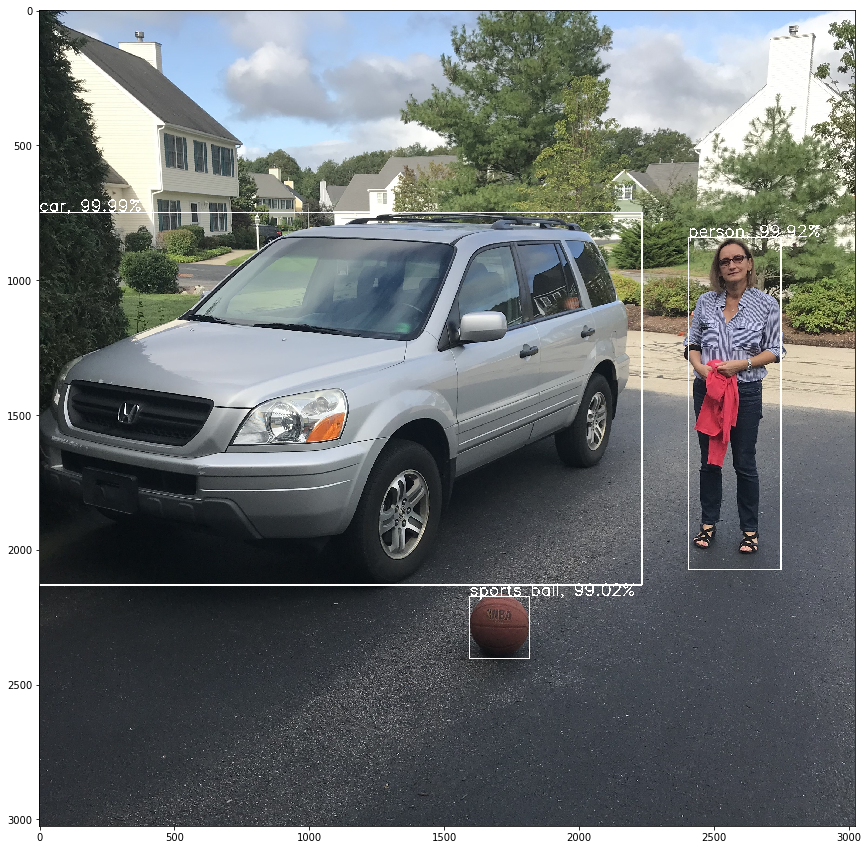

In [5]:
import cv2
import numpy  as np
from matplotlib import pyplot as plt


%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)


img = cv2.imread('/content/tensorflow_yolo_v3/img1_yolo_v3.jpg')
print(type(img))
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

2019-06-05 17:36:09.167066: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/img2.jpg
total inference time was: 3.09 seconds (that's 19.41 fps!)
image with detections saved as:  img2_yolo_v3.jpg


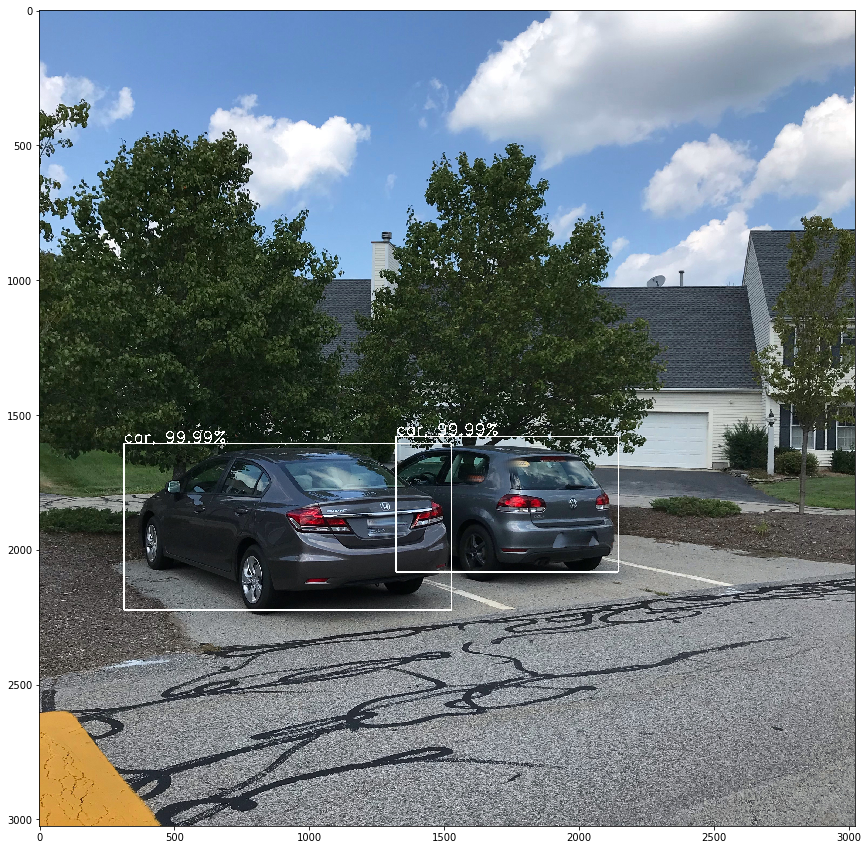

In [6]:
!python detect.py --path_to_input_image=training_data/images/img2.jpg
img = cv2.imread('img2_yolo_v3.jpg')
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

#### And here is example photo, where **immediately and false positives (lemon adopted for orange), and omissions (not seen Apple)**

In [31]:
os.chdir('/content/tensorflow_yolo_v3/training_data/images')
!wget http://www.autoneva.ru/images/albums/lamborghini/2014_lamborghini_aventador_lp_700-4_roadster/novitec-torado_2014_lamborghini_aventador_lp_700-4_roadster_008.jpg
!ls

--2019-06-05 17:59:13--  http://www.autoneva.ru/images/albums/lamborghini/2014_lamborghini_aventador_lp_700-4_roadster/novitec-torado_2014_lamborghini_aventador_lp_700-4_roadster_008.jpg
Resolving www.autoneva.ru (www.autoneva.ru)... 5.189.239.78
Connecting to www.autoneva.ru (www.autoneva.ru)|5.189.239.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195560 (191K) [image/jpeg]
Saving to: ‘novitec-torado_2014_lamborghini_aventador_lp_700-4_roadster_008.jpg’

novitec-torado_2014 100%[===================>] 190.98K   243KB/s    in 0.8s    

2019-06-05 17:59:15 (243 KB/s) - ‘novitec-torado_2014_lamborghini_aventador_lp_700-4_roadster_008.jpg’ saved [195560/195560]

 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg.1
'images?q=tbn:ANd9GcSbonWFeg9g9DeQMI751_DRAxloaF-a91PfPnrCKL2816fSjyoF'
 img1.jpg
 img2.jpg
 img3.jpg
 maxresdefault1.jpg
 maxresdefault.jpg
 novitec-torado_2014_lamborghini_aventador_lp_700-4_ro

In [34]:
os.chdir('/content/tensorflow_yolo_v3')
!python detect.py --path_to_input_image=training_data/images/tmb_194950_6413.jpg

2019-06-05 18:03:00.350780: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/tmb_194950_6413.jpg
total inference time was: 3.21 seconds (that's 18.69 fps!)
image with detections saved as:  tmb_194950_6413_yolo_v3.jpg


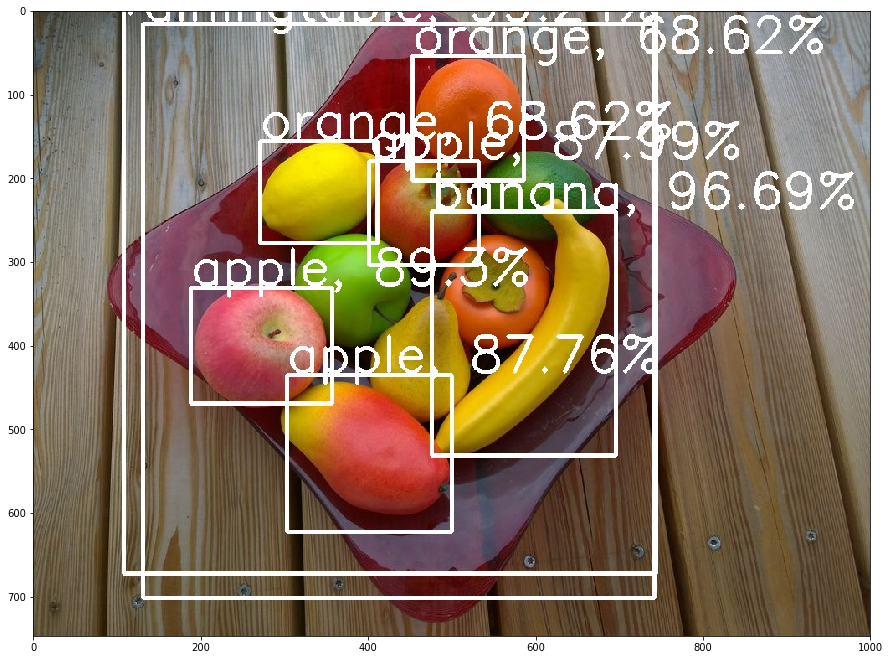

In [35]:
img = cv2.imread('tmb_194950_6413_yolo_v3.jpg')
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

#### And here are examples of successful detection of heavily overlapped objects

In [40]:
os.chdir('/content/tensorflow_yolo_v3/training_data/images')
!wget https://w-dog.ru/wallpapers/8/9/487305278293574.jpg
!ls

--2019-06-05 18:17:00--  https://w-dog.ru/wallpapers/8/9/487305278293574.jpg
Resolving w-dog.ru (w-dog.ru)... 95.213.131.62
Connecting to w-dog.ru (w-dog.ru)|95.213.131.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 610283 (596K) [image/jpeg]
Saving to: ‘487305278293574.jpg’

487305278293574.jpg 100%[===================>] 595.98K   567KB/s    in 1.1s    

2019-06-05 18:17:03 (567 KB/s) - ‘487305278293574.jpg’ saved [610283/610283]

 487305278293574.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg.1
'images?q=tbn:ANd9GcSbonWFeg9g9DeQMI751_DRAxloaF-a91PfPnrCKL2816fSjyoF'
 img1.jpg
 img2.jpg
 img3.jpg
 maxresdefault1.jpg
 maxresdefault.jpg
 nintchdbpict000283933468.jpg
 novitec-torado_2014_lamborghini_aventador_lp_700-4_roadster_008.jpg
 rossijskuyu_propisku_poluchila_esche_odna_korejskaya_mashina.jpg
 RphqSQr
 tmb_194950_6413.jpg
 tmb_194950_6413.jpg.1


In [41]:
os.chdir('/content/tensorflow_yolo_v3')
!python detect.py --path_to_input_image=training_data/images/487305278293574.jpg

2019-06-05 18:17:26.979732: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/487305278293574.jpg
total inference time was: 3.17 seconds (that's 18.95 fps!)
image with detections saved as:  487305278293574_yolo_v3.jpg


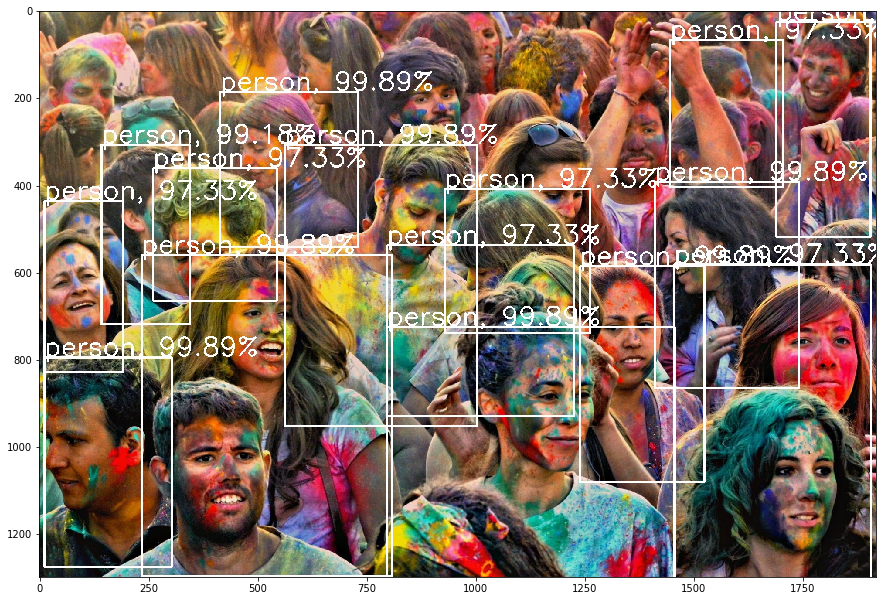

In [42]:
img = cv2.imread('487305278293574_yolo_v3.jpg')
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

In [43]:
os.chdir('/content/tensorflow_yolo_v3/training_data/images')
!wget https://upload.wikimedia.org/wikipedia/commons/d/da/Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ.jpg
!ls

--2019-06-05 18:20:06--  https://upload.wikimedia.org/wikipedia/commons/d/da/%D0%9C%D0%B0%D1%80%D1%88_%D0%BC%D0%B8%D1%80%D0%B0_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0_21_%D1%81%D0%B5%D0%BD%D1%82_2014_L1450817_%D0%9B%D0%AE%D0%94%D0%98.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2510444 (2.4M) [image/jpeg]
Saving to: ‘Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ.jpg’

Марш_мира_Москва_21 100%[===================>]   2.39M  2.06MB/s    in 1.2s    

2019-06-05 18:20:08 (2.06 MB/s) - ‘Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ.jpg’ saved [2510444/2510444]

 487305278293574.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg.1
'images?q=tbn:ANd9GcSbonWFeg9g9DeQMI751_DRAxloaF-a91PfPnrCKL2816fSjyoF'
 img1.jpg
 img2.jpg
 img3.jpg
 maxresd

In [44]:
os.chdir('/content/tensorflow_yolo_v3')
!python detect.py --path_to_input_image=training_data/images/Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ.jpg

2019-06-05 18:20:57.507991: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ.jpg
total inference time was: 3.15 seconds (that's 19.03 fps!)
image with detections saved as:  Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ_yolo_v3.jpg


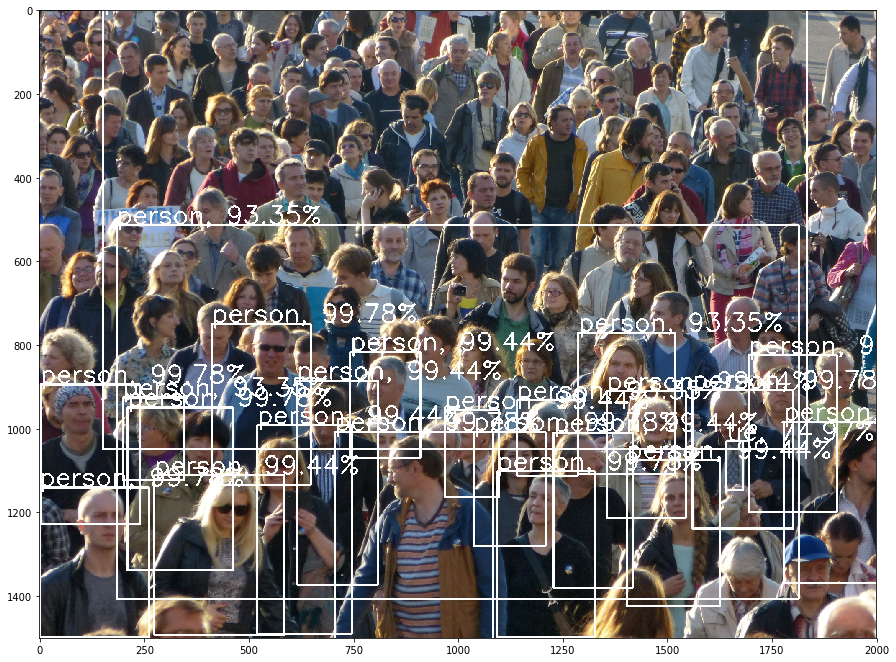

In [45]:
img = cv2.imread('Марш_мира_Москва_21_сент_2014_L1450817_ЛЮДИ_yolo_v3.jpg')
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

#### And here is an example of a poor response in ideal conditions

In [51]:
os.chdir('/content/tensorflow_yolo_v3/training_data/images')
!wget http://m-a-s-o.narod.ru/wp/animat/sh/shrek/shrek_001.jpg
#!mv maxresdefault.jpg.1 maxresdefault1.jpg
!ls

--2019-06-05 18:34:58--  http://m-a-s-o.narod.ru/wp/animat/sh/shrek/shrek_001.jpg
Resolving m-a-s-o.narod.ru (m-a-s-o.narod.ru)... 193.109.247.227
Connecting to m-a-s-o.narod.ru (m-a-s-o.narod.ru)|193.109.247.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494892 (483K) [image/jpeg]
Saving to: ‘shrek_001.jpg’

shrek_001.jpg       100%[===================>] 483.29K   176KB/s    in 2.8s    

2019-06-05 18:35:02 (176 KB/s) - ‘shrek_001.jpg’ saved [494892/494892]

 487305278293574.jpg
 593da8ef7af145e5585f132b9836a8b787db836b5670090b882ef83ccf2b8f78.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg
 6FD362B0-E5C7-4E83-84B7-E93D6C1B5FBE_w1023_r1_s.jpg.1
'images?q=tbn:ANd9GcSbonWFeg9g9DeQMI751_DRAxloaF-a91PfPnrCKL2816fSjyoF'
 img1.jpg
 img2.jpg
 img3.jpg
 maxresdefault1.jpg
 maxresdefault.jpg
 monsters_inc_01.jpg
 nintchdbpict000283933468.jpg
 novitec-torado_2014_lamborghini_aventador_lp_700-4_roadster_008.jpg
 rossijskuyu_propisku_poluchila_esche_odna_kor

2019-06-05 18:36:15.265365: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/monsters_inc_01.jpg
total inference time was: 3.15 seconds (that's 19.07 fps!)
image with detections saved as:  monsters_inc_01_yolo_v3.jpg


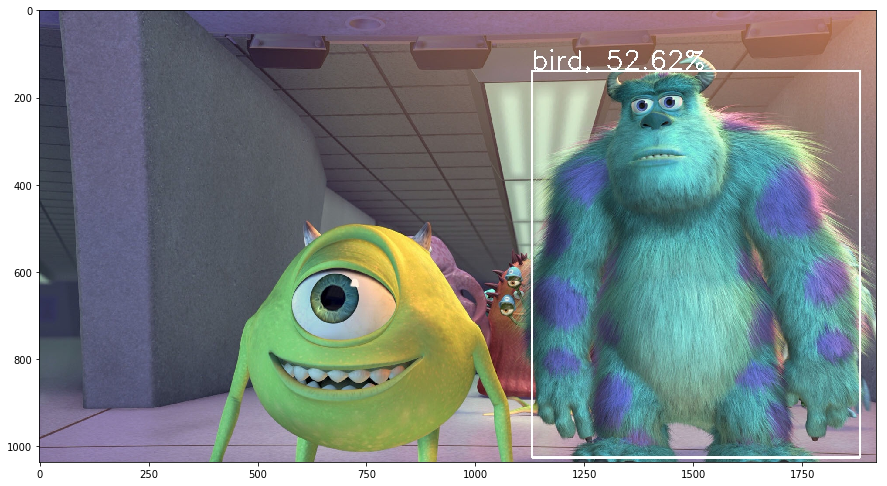

In [53]:
os.chdir('/content/tensorflow_yolo_v3')
!python detect.py --path_to_input_image=training_data/images/monsters_inc_01.jpg
img = cv2.imread('monsters_inc_01_yolo_v3.jpg')
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)    

2019-06-05 18:43:49.956826: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
restoring model weights...
feeding image found at filepath:  training_data/images/88453.jpg
total inference time was: 3.05 seconds (that's 19.7 fps!)
image with detections saved as:  88453_yolo_v3.jpg


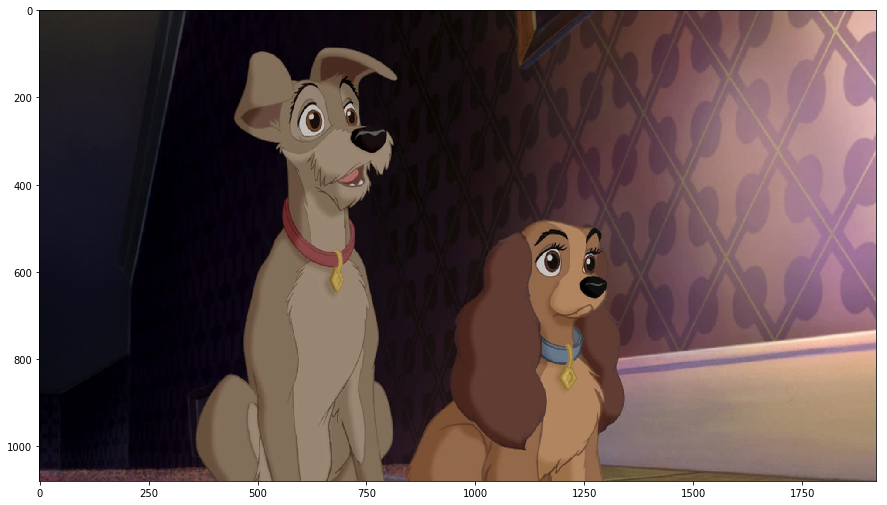

In [62]:
os.chdir('/content/tensorflow_yolo_v3')
!python detect.py --path_to_input_image=training_data/images/88453.jpg
img = cv2.imread('88453_yolo_v3.jpg')
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)    